<a href="https://colab.research.google.com/github/Farnazkash/Persian_Handwriting_Recognition/blob/master/Persian_Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Persian_Handwriting_Recognition***
==

*   Input : A form containing ID, Firstname, Lastname and Degree of the form filler.

*   Output: these four fields of the form

In this project, a dataset of handwritten characters and digits has been gathered. Then two neural networks have been trained to classify handwritten Persian letters and digits. So finally it can automatically read the form.

# Import Libraries

In [ ]:
import cv2 as cv2
import numpy as np
import pickle
import cv2 as cv2
import os
import glob
from tqdm import tqdm
import math

#Global Variables

In [ ]:
ID = {}
Firstname = {}
Lastname = {}
Degree = {}

#DATASET

In the first step, we need to prepare the dataset. In this project, around 300 images including handwritten Persian letters and digits have been used. To make the labeling process easier, the names of folders have chosen as the labels of the data in this dataset.
So, the dataset has separated to two digits and letters folders.
Digits folder has ten folders ranging from zero to nine.
Because Persian has 32 letters, in letters folder we have 32 folders ranging from 0 (letter 'الف') to 31 (letter 'ی').

## Create Dataset Folders
To use these images, their perspective should be corrected.
Each image that has been used in the dataset has 4 [aruco](https://docs.opencv.org/trunk/d5/dae/tutorial_aruco_detection.html) markers in its corners. These markers have helped us to rectify images.

In [ ]:
codes = ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
         '2', '3',
         '4', '5', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '6',
         '7', '8', '9'
         ]
folder_counter = np.zeros(42)

def extract_cells(f,file):
    I = f
    dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
    parameters = cv2.aruco.DetectorParameters_create()
    markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(I, dictionary, parameters=parameters)
    
    aruco_list = {}
    for k in range(len(markerCorners)):
        temp_1 = markerCorners[k]
        temp_1 = temp_1[0]
        temp_2 = markerIds[k]
        temp_2 = temp_2[0]
        aruco_list[temp_2] = temp_1

    p1 = aruco_list[30][0]
    p2 = aruco_list[31][1]
    p3 = aruco_list[32][3]
    p4 = aruco_list[33][2]
    points2 = np.array([(0, 0),
                        (392, 0),
                        (0, 588),
                        (392, 588)]).astype(np.float32)

    points1 = np.array([p1, p2, p3, p4], dtype=np.float32)

    m = 588
    n = 392
    output_size = (n, m)
    H = cv2.getPerspectiveTransform(points1, points2)
    J = cv2.warpPerspective(I, H, output_size)

    col_number = n // 28
    row_number = m // 28

    form_num = file[8]
    for i in range(row_number):
        for j in range(col_number):
            ROI = J[i * 28:(i * 28) + 28, j * 28:(j * 28) + 28]
            index = i if form_num == '1' else i + 21
            if not os.path.exists('dataset/'+codes[index]):
                os.makedirs('dataset/'+ codes[index])
            if not (i < 2 and (j < 2 or j > 11)) and not (i > 18 and (j < 2 or j > 11)):
                cv2.imwrite('dataset/{}/{}.png'.format(codes[index], str(folder_counter[int(codes[index])])), ROI)
                folder_counter[int(codes[index])] += 1

In [ ]:
raw_data = './dataset/'
images_list = os.listdir(raw_data)

for file in images_list:
    f = cv2.imread(raw_data + file)
    extract_cells(f,file)

##Labeling


###Digit Labeling

In [ ]:
train_dirs_digits = glob.glob("dataset/digits/*")
train_dirs_digits.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
data_digit = []
labels_digit = []
for train_dir in tqdm(train_dirs_digits):
  imgPaths = glob.glob(train_dir + "/*.png")
  imgPaths.sort()
  for imgPath in tqdm(imgPaths):
    image = load_img(imgPath, target_size=(28, 28), grayscale=True)
    image = img_to_array(image)
    data_digit.append(image)
    label = imgPath.split(os.path.sep)[-2]
    label = int(label)
    labels_digit.append(label)

with open('data_digit.pkl', 'wb') as f:
  pickle.dump(data_digit, f)

with open('labels_digit.pkl', 'wb') as fi:
  pickle.dump(labels_digit, fi)

###Letter Labeling

In [ ]:
train_dirs = glob.glob("dataset/letter/*")
train_dirs.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
data_letter = []
labels_letter = []
for train_dir in tqdm(train_dirs):
    imgPaths = glob.glob(train_dir + "/*.png")
    imgPaths.sort()
    for imgPath in tqdm(imgPaths):
        image = load_img(imgPath, target_size=(28, 28), grayscale=True)
        image = img_to_array(image)
        data_letter.append(image)

        label = imgPath.split(os.path.sep)[-2]
        label = int(label)
        labels_letter.append(label)

with open('data_letter.pkl', 'wb') as f:
  pickle.dump(data_letter, f)

with open('labels_letter.pkl', 'wb') as fi:
  pickle.dump(labels_letter, fi)

##Reading Data & Label Files
Once the dataset prepared, by saving data and labels to files, you won't need to do the labeling process again.

In [ ]:
with open('data_digit.pkl', 'rb') as f:
  data_digit = pickle.load(f)

with open('labels_digit.pkl', 'rb') as fi:
  labels_digit = pickle.load(fi)

In [ ]:
with open('data_letter.pkl', 'rb') as f:
  data_letter = pickle.load(f)

with open('labels_letter.pkl', 'rb') as fi:
  labels_letter = pickle.load(fi)

In [ ]:
print("digits data size:")
print(len(data_digit),len(labels_digit))
print("letters data size:")
print(len(data_letter),len(labels_letter))

digits data size:
15848 15848
letters data size:
65884 65884


# Read Forms & Extract Cells
Reading test forms from a folder and extracting cells that have digits or letters and saving extracted cells in a folder with the name of the form.

In [ ]:
def empty_cell(cell):
    x1 = int(cell.shape[0] * 0.2)
    x2 = int(cell.shape[0] * 0.8)
    y1 = int(cell.shape[1] * 0.2)
    y2 = int(cell.shape[1] * 0.8)
    cell = cell[x1:x2, y1:y2]
    gray = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 57, 7)
    total_white = cv2.countNonZero(thresh)
    ratio = total_white / float((x2-x1) * (y2-y1))
    if ratio > 0.98:
        return True
    return False

In [ ]:
def detect_degree(options):
    min_ratio = math.inf
    min_index = 0

    for index, opt in enumerate(options):
        x1 = int(opt.shape[0] * 0.2)
        x2 = int(opt.shape[0] * 0.8)
        y1 = int(opt.shape[1] * 0.2)
        y2 = int(opt.shape[1] * 0.8)
        opt = opt[x1:x2, y1:y2]

        gray = cv2.cvtColor(opt, cv2.COLOR_BGR2GRAY)

        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 57, 5)
        total_white = cv2.countNonZero(thresh)

        ratio = total_white / float(thresh.shape[0] * thresh.shape[1])
        if (ratio < min_ratio):
            min_ratio = ratio
            min_index = index
    return min_index

In [ ]:
def extracted_form_test(path):
    I = cv2.imread(path)
    dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
    parameters = cv2.aruco.DetectorParameters_create()
    markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(I, dictionary, parameters=parameters)

    aruco_list = {}
    for k in range(len(markerCorners)):
        temp_1 = markerCorners[k]
        temp_1 = temp_1[0]
        temp_2 = markerIds[k]
        temp_2 = temp_2[0]
        aruco_list[temp_2] = temp_1

    p1 = aruco_list[34][3]
    p2 = aruco_list[35][2]
    p3 = aruco_list[33][0]
    p4 = aruco_list[36][1]

    width = 500
    height = 550
    points2 = np.array([(0, 0),
                        (width, 0),
                        (0, height),
                        (width, height)]).astype(np.float32)

    points1 = np.array([p1, p2, p3, p4], dtype=np.float32)

    output_size = (width, height)
    H = cv2.getPerspectiveTransform(points1, points2)
    J = cv2.warpPerspective(I, H, output_size)

    gray = cv2.cvtColor(J, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 57, 7)
    kernelOpen = np.ones((2, 2), np.uint8)
    open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernelOpen)
    kernel = np.ones((2, 2), np.uint8)
    close = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel)

    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    min_x = 5
    max_x = 50
    dir = path.split(os.path.sep)[-1]
    folder_name = dir[:-4]
    image_number = 1
    count = 0
    index = 0
    degree = ["PHD", "MS", "BS"]
    info = ['ID','FN', 'LN']
    degree_option = []
    sorted_Y = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[1])
    sorted_X = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[0])

    for c in sorted_Y:
        x, y, w, h = cv2.boundingRect(c)
        if (x > min_x and x < max_x and y < 280 and w>10):
            square_w = w // 9 + 5
            h -= 5
            for i in range(0, 8):
                x_start = x + square_w * i
                cell = J[y:y + h, x_start:x_start + square_w]
                if not os.path.exists('extracted_form_test/' + str(folder_name)):
                  os.makedirs('extracted_form_test/' + str(folder_name))
                if not empty_cell(cell):
                  cv2.imwrite('extracted_form_test/{}/{}.png'.format(str(folder_name) , info[index] + str(image_number)), cell)
                  image_number += 1
            index += 1
            image_number = 1
    for c in sorted_X:
        x, y, w, h = cv2.boundingRect(c)
        if (w > 16 and w < 22 and y > 300 and h / w > 0.95):
            cell = J[y:y + h, x:x + w]
            if not os.path.exists('extracted_form_test/' + str(folder_name)):
              os.makedirs('extracted_form_test/' + str(folder_name))
            cv2.imwrite('extracted_form_test/{}/{}.png'.format(str(folder_name), degree[count]), cell)
            degree_option.append(cell)
            count += 1

    return degree[detect_degree(degree_option)]  

In [ ]:
form_test_dir = glob.glob("form_test/*")

for test_dir in tqdm(form_test_dir):
    dir = test_dir.split(os.path.sep)[-1]
    folder_name = dir[:-4]
    Degree[folder_name] = extracted_form_test(test_dir)


100%|██████████| 20/20 [05:27<00:00, 16.40s/it]


# Digit Neural Network

In [ ]:
num_classes_digit = 10
EPOCHS_digit = 10
BS_digit = 32

In [ ]:
data_digit = np.array(data_digit, dtype=np.float) / 255.
labels_digit = np.array(labels_digit)

In [ ]:
from sklearn.model_selection import train_test_split
train_input_digit, test_input_digit, train_target_digit, test_target_digit =  train_test_split(data_digit,
                                                                              labels_digit,
                                                                              test_size=0.05,
                                                                              random_state=123)
train_input_digit, valid_input_digit, train_target_digit, valid_target_digit =  train_test_split(train_input_digit,
                                                                                train_target_digit,
                                                                                test_size=0.25,
                                                                                random_state=123)

In [ ]:
from keras.utils import to_categorical
train_target_digit = to_categorical(train_target_digit, num_classes=num_classes_digit)
valid_target_digit = to_categorical(valid_target_digit, num_classes=num_classes_digit)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1)

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Model
def build_model(inputs):
  x = inputs

  x = Conv2D(filters=20, kernel_size=(5, 5), padding="same", activation="relu")(x)
  x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

  x = Conv2D(filters=50, kernel_size=(5, 5), padding="same", activation="relu")(x)
  x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x) 

  x = Flatten()(x)
  x = Dense(500, activation="relu")(x)
  outputs = Dense(num_classes_digit, activation="softmax")(x)

  model = Model(inputs, outputs, name="LeNet")
  model.summary()
  
  return model

In [ ]:
from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

input = Input((28, 28, 1))
model_digit = build_model(input)

opt = Adam()
model_digit.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])

checkpoint = ModelCheckpoint(filepath="model_digit.h5",
                             monitor="val_acc",
                             verbose=1,
                             save_best_only=True)
batches = aug.flow(train_input_digit, train_target_digit, batch_size=BS_digit)
training_log = model_digit.fit_generator(batches,
                        samples_per_epoch=batches.n,
                        steps_per_epoch=len(train_input_digit) // BS_digit,
                        validation_data=[valid_input_digit, valid_target_digit],
                        epochs=EPOCHS_digit,
                        callbacks=[checkpoint])

Model: "LeNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               122550

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=352, validation_data=[array([[[..., epochs=10, callbacks=[<keras.ca...)`


Epoch 1/10
352/352 [==============================] - 28s 80ms/step - loss: 1.7767 - acc: 0.3348 - val_loss: 0.9924 - val_acc: 0.6743

Epoch 00001: val_acc improved from -inf to 0.67428, saving model to model_digit.h5
Epoch 2/10
352/352 [==============================] - 28s 80ms/step - loss: 0.9304 - acc: 0.6914 - val_loss: 0.5183 - val_acc: 0.8249

Epoch 00002: val_acc improved from 0.67428 to 0.82492, saving model to model_digit.h5
Epoch 3/10
352/352 [==============================] - 28s 79ms/step - loss: 0.6208 - acc: 0.7890 - val_loss: 0.3372 - val_acc: 0.8921

Epoch 00003: val_acc improved from 0.82492 to 0.89214, saving model to model_digit.h5
Epoch 4/10
352/352 [==============================] - 28s 79ms/step - loss: 0.4768 - acc: 0.8430 - val_loss: 0.2818 - val_acc: 0.9033

Epoch 00004: val_acc improved from 0.89214 to 0.90329, saving model to model_digit.h5
Epoch 5/10
352/352 [==============================] - 28s 79ms/step - loss: 0.3657 - acc: 0.8789 - val_loss: 0.2331 - v

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(EPOCHS_digit), training_log.history["loss"], label="train_loss")
plt.plot(np.arange(EPOCHS_digit), training_log.history["acc"], label="train_acc")
plt.plot(np.arange(EPOCHS_digit), training_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(EPOCHS_digit), training_log.history["val_acc"], label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("loss/accuracy")
plt.title("training plot digit")
plt.legend(loc="lower left")
plt.savefig("training_plot_digit.png")

In [ ]:
correct = 0
for idx,test in enumerate(test_input_digit):
  test = np.expand_dims(test, 0)
  model_digit.load_weights("model_digit.h5")
  predictions = model_digit.predict(test)[0]
  label = np.argmax(predictions)
  if (label == test_target_digit[idx]):  
    correct += 1
test_accuracy = correct/len(test_target_digit)
print("test_accuracy_digit:" , test_accuracy)

test_accuracy_digit: 0.9773013871374527


# Letter Neural Network

In [ ]:
num_classes_letter = 32
EPOCHS_letter = 20
BS_letter = 32

In [ ]:
data_letter = np.array(data_letter, dtype=np.float) / 255.
labels_letter = np.array(labels_letter)

In [ ]:
from sklearn.model_selection import train_test_split
train_input_letter, test_input_letter, train_target_letter, test_target_letter =  train_test_split(data_letter,
                                                                              labels_letter,
                                                                              test_size=0.05,
                                                                              random_state=123)
train_input_letter, valid_input_letter, train_target_letter, valid_target_letter =  train_test_split(train_input_letter,
                                                                                train_target_letter,
                                                                                test_size=0.25,
                                                                                random_state=123)

In [ ]:
from keras.utils import to_categorical
train_target_letter = to_categorical(train_target_letter, num_classes=num_classes_letter)
valid_target_letter = to_categorical(valid_target_letter, num_classes=num_classes_letter)

Using TensorFlow backend.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1)

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Model
def build_model_letter(inputs):
  x = inputs

  x = Conv2D(filters=20, kernel_size=(5, 5), padding="same", activation="relu")(x)
  x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

  x = Conv2D(filters=50, kernel_size=(5, 5), padding="same", activation="relu")(x)
  x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x) 

  x = Flatten()(x)
  x = Dense(500, activation="relu")(x)
  outputs = Dense(num_classes_letter, activation="softmax")(x)

  model = Model(inputs, outputs, name="LeNet")
  model.summary()
  
  return model

Using TensorFlow backend.


In [ ]:
from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

input = Input((28, 28, 1))
model_letter = build_model_letter(input)

opt = Adam()
model_letter.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])

checkpoint = ModelCheckpoint(filepath="model_letter.h5",
                             monitor="val_acc",
                             verbose=1,
                             save_best_only=True)
batches = aug.flow(train_input_letter, train_target_letter, batch_size=BS_letter)
training_log = model_letter.fit_generator(batches,
                        samples_per_epoch=batches.n,
                        steps_per_epoch=len(train_input_letter) // BS_letter,
                        validation_data=[valid_input_letter, valid_target_letter],
                        epochs=EPOCHS_letter,
                        callbacks=[checkpoint])

Model: "LeNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               122550

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=1466, validation_data=[array([[[..., epochs=20, callbacks=[<keras.ca...)`


Epoch 1/20
1466/1466 [==============================] - 123s 84ms/step - loss: 3.3946 - acc: 0.0498 - val_loss: 2.2212 - val_acc: 0.3349

Epoch 00001: val_acc improved from -inf to 0.33493, saving model to model_letter.h5
Epoch 2/20
1466/1466 [==============================] - 119s 81ms/step - loss: 1.6572 - acc: 0.4843 - val_loss: 0.9504 - val_acc: 0.6918

Epoch 00002: val_acc improved from 0.33493 to 0.69178, saving model to model_letter.h5
Epoch 3/20
1466/1466 [==============================] - 119s 81ms/step - loss: 1.0594 - acc: 0.6598 - val_loss: 0.6220 - val_acc: 0.7956

Epoch 00003: val_acc improved from 0.69178 to 0.79556, saving model to model_letter.h5
Epoch 4/20
1466/1466 [==============================] - 119s 81ms/step - loss: 0.7534 - acc: 0.7503 - val_loss: 0.4762 - val_acc: 0.8415

Epoch 00004: val_acc improved from 0.79556 to 0.84151, saving model to model_letter.h5
Epoch 5/20
1466/1466 [==============================] - 119s 81ms/step - loss: 0.6018 - acc: 0.8006 - v

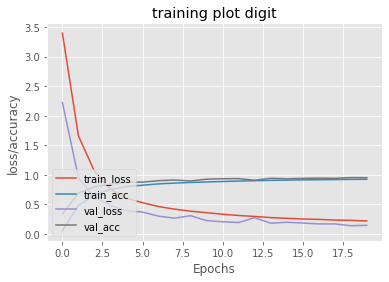

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(EPOCHS_letter), training_log.history["loss"], label="train_loss")
plt.plot(np.arange(EPOCHS_letter), training_log.history["acc"], label="train_acc")
plt.plot(np.arange(EPOCHS_letter), training_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(EPOCHS_letter), training_log.history["val_acc"], label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("loss/accuracy")
plt.title("training plot digit")
plt.legend(loc="lower left")
plt.savefig("training_plot_letter.png")

In [ ]:
correct = 0
false=0
for idx,test in enumerate(test_input_letter):
  test = np.expand_dims(test, 0)
  model_letter.load_weights("model_letter.h5")
  predictions = model_letter.predict(test)[0]
  label = np.argmax(predictions)
  if (label == test_target_letter[idx]): 
    correct += 1
test_accuracy = correct/len(test_target_letter)
print("test_accuracy_letter:" , test_accuracy)

test_accuracy_letter: 0.9138088012139606


# Resualts

**⚠**  Because of the shortage of the dataset size, neural networks couldn't have been trained well and final results are not as good as we expected.

In [ ]:
def predict(model,model_type, imgPath):
  image = load_img(imgPath, target_size=(28, 28), grayscale=True)
  image = img_to_array(image) / 255.
  orig_img = image.copy()
  image = np.expand_dims(image, 0)
  model.load_weights(model_type)
  predictions = model.predict(image)[0]
  label = np.argmax(predictions)
  return label

In [ ]:
def decode(code):
  codes={ 0:'ا',1:'ب',2:'پ',3:'ت',4:'ث',5:'ج',6:'چ',7:'ح',8:'خ',9:'د',10:'ذ',11:'ر',
       12:'ز',13:'ژ',14:'س',15:'ش',16:'ص',17:'ض',18:'ط',19:'ظ',20:'ع',21:'غ',22:'ف',23:'ق',
       24:'ک',25:'گ',26:'ل',27:'م',28:'ن',29:'و',30:'ه',31:'ی'}
  plain = codes[code]
  return plain

In [ ]:
from keras.layers import Input
input = Input((28, 28, 1))
model_digit = build_model(input)
model_letter = build_model_letter(input)

from keras.preprocessing.image import load_img, img_to_array
model_type = None
detected_ID = ''
detected_FN = ''
detected_LN = ''
test_forms = glob.glob("extracted_form_test/*")
test_forms.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
for test_dir in test_forms:
  form_id = test_dir.split(os.path.sep)[-1]
  imgPaths = glob.glob(test_dir + "/*.png")
  imgPaths.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
  for imgPath in tqdm(imgPaths):
    image = load_img(imgPath, target_size=(28, 28), grayscale=True)
    image = img_to_array(image) / 255.
    orig_img = image.copy()
    image = np.expand_dims(image, 0)
    if(imgPath.find('ID') != -1):
      model_type = 'model_digit.h5'
      detected_ID += str(predict(model_digit,model_type,imgPath))
    if(imgPath.find('FN') != -1):
      model_type = 'model_letter.h5'
      detected_FN += decode(predict(model_letter,model_type,imgPath))
    if(imgPath.find('LN')!=-1):
      model_type = 'model_letter.h5'
      detected_LN += decode(predict(model_letter,model_type,imgPath))
  ID[form_id] = detected_ID
  detected_ID = ''
  Firstname[form_id] = detected_FN[::-1]
  detected_FN = ''
  Lastname[form_id] = detected_LN[::-1]
  detected_LN = ''

  0%|          | 0/22 [00:00<?, ?it/s]

Model: "LeNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               122550

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 23/23 [00:13<00:00,  1.73it/s]


In [ ]:
for key,value in Lastname.items():
  print("-------------------------------------")
  print("Image:", key)
  print("ID",ID[key])
  print("Firstname",Firstname[key])
  print("Lastname",Lastname[key])
  print("Degree", Degree[key])


-------------------------------------
Image: 1
ID 9657213
Firstname نظا
Lastname سلطانی
Degree PHD
-------------------------------------
Image: 2
ID 0977901
Firstname معموتاقر
Lastname سالاری
Degree BS
-------------------------------------
Image: 3
ID 98756232
Firstname شفق
Lastname اسدی
Degree PHD
-------------------------------------
Image: 4
ID 94444121
Firstname نیلا
Lastname امین
Degree PHD
-------------------------------------
Image: 5
ID 9527502
Firstname امیوعلی
Lastname حسینزاده
Degree BS
-------------------------------------
Image: 6
ID 9323993
Firstname طاها
Lastname سماواتی
Degree BS
-------------------------------------
Image: 7
ID 98731243
Firstname فرزاد
Lastname صبحی
Degree MS
-------------------------------------
Image: 8
ID 95012121
Firstname رزیتا
Lastname عظیمیان
Degree MS
-------------------------------------
Image: 9
ID 99337567
Firstname سهبد
Lastname تابعی
Degree BS
-------------------------------------
Image: 10
ID 9312567
Firstname سیما
Lastname نظری
Degree BS

###**Final Resaults**

Reading and extracting ID, Firstname, Lastname, and Degree of 20 test forms and computing the time of this process.

In [ ]:
import timeit

start = timeit.default_timer()

form_test_dir = glob.glob("form_test/*")


for test_dir in tqdm(form_test_dir):
    dir = test_dir.split(os.path.sep)[-1]
    folder_name = dir[:-4]
    Degree[folder_name] = extracted_form_test(test_dir)

input = Input((28, 28, 1))
model_digit = build_model(input)
model_letter = build_model_letter(input)

from keras.preprocessing.image import load_img, img_to_array
model_type = None
detected_ID = ''
detected_FN = ''
detected_LN = ''
test_forms = glob.glob("extracted_form_test/*")
test_forms.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
for test_dir in test_forms:
  form_id = test_dir.split(os.path.sep)[-1]
  imgPaths = glob.glob(test_dir + "/*.png")
  imgPaths.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
  for imgPath in tqdm(imgPaths):
    image = load_img(imgPath, target_size=(28, 28), grayscale=True)
    image = img_to_array(image) / 255.
    orig_img = image.copy()
    image = np.expand_dims(image, 0)
    if(imgPath.find('ID') != -1):
      model_type = 'model_digit.h5'
      detected_ID += str(predict(model_digit,model_type,imgPath))
    if(imgPath.find('FN') != -1):
      model_type = 'model_letter.h5'
      detected_FN += decode(predict(model_letter,model_type,imgPath))
    if(imgPath.find('LN')!=-1):
      model_type = 'model_letter.h5'
      detected_LN += decode(predict(model_letter,model_type,imgPath))
  ID[form_id] = detected_ID
  detected_ID = ''
  Firstname[form_id] = detected_FN[::-1]
  detected_FN = ''
  Lastname[form_id] = detected_LN[::-1]
  detected_LN = ''

for key,value in Lastname.items():
  print("-------------------------------------")
  print("Form:", key)
  print("ID",ID[key])
  print("Firstname",Firstname[key])
  print("Lastname",Lastname[key])
  print("degree:",Degree[key])

stop = timeit.default_timer()
print('Time: ', stop - start)




  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:00<00:05,  3.37it/s]


 10%|█         | 2/20 [00:00<00:05,  3.48it/s]


 15%|█▌        | 3/20 [00:00<00:04,  3.77it/s]


 20%|██        | 4/20 [00:00<00:04,  4.00it/s]


 25%|██▌       | 5/20 [00:01<00:03,  3.83it/s]


 30%|███       | 6/20 [00:01<00:03,  3.67it/s]


 35%|███▌      | 7/20 [00:01<00:03,  3.72it/s]


 40%|████      | 8/20 [00:02<00:03,  3.70it/s]


 45%|████▌     | 9/20 [00:02<00:02,  3.78it/s]


 50%|█████     | 10/20 [00:02<00:02,  3.82it/s]


 55%|█████▌    | 11/20 [00:02<00:02,  3.72it/s]


 60%|██████    | 12/20 [00:03<00:02,  3.99it/s]


 65%|██████▌   | 13/20 [00:03<00:01,  3.91it/s]


 70%|███████   | 14/20 [00:03<00:01,  3.88it/s]


 75%|███████▌  | 15/20 [00:03<00:01,  3.93it/s]


 80%|████████  | 16/20 [00:04<00:00,  4.02it/s]


 85%|████████▌ | 17/20 [00:04<00:00,  3.87it/s]


 90%|█████████ | 18/20 [00:04<00:00,  3.73it/s]


 95%|█████████▌| 19/20 [00:04<00:00,  3.75it/s]


100%|██████████

Model: "LeNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_148 (MaxPoolin (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_74 (Flatten)         (None, 2450)              0         
_________________________________________________________________
dense_145 (Dense)            (None, 500)               122550

 26%|██▋       | 5/19 [00:00<00:00, 37.55it/s]


 53%|█████▎    | 10/19 [00:00<00:00, 39.20it/s]


100%|██████████| 19/19 [00:00<00:00, 41.49it/s]



  0%|          | 0/24 [00:00<?, ?it/s]


 33%|███▎      | 8/24 [00:00<00:00, 73.06it/s]


 54%|█████▍    | 13/24 [00:00<00:00, 53.01it/s]


 71%|███████   | 17/24 [00:00<00:00, 45.51it/s]


100%|██████████| 24/24 [00:00<00:00, 42.52it/s]



  0%|          | 0/18 [00:00<?, ?it/s]


 44%|████▍     | 8/18 [00:00<00:00, 68.11it/s]


 72%|███████▏  | 13/18 [00:00<00:00, 58.53it/s]


100%|██████████| 18/18 [00:00<00:00, 50.97it/s]



  0%|          | 0/19 [00:00<?, ?it/s]


 42%|████▏     | 8/19 [00:00<00:00, 72.10it/s]


 68%|██████▊   | 13/19 [00:00<00:00, 60.01it/s]


100%|██████████| 19/19 [00:00<00:00, 49.77it/s]



  0%|          | 0/25 [00:00<?, ?it/s]


 32%|███▏      | 8/25 [00:00<00:00, 72.74it/s]


 48%|████▊     | 12/25 [00:00<00:00, 55.65it/s]


 68%|██████▊   | 17/25 [00:00<00:00, 51.05it/s]


100%|██████████| 25/25 [00:00<00:00, 

-------------------------------------
Form: 1
ID 9657213
Firstname نظا
Lastname سلطانی
degree: PHD
-------------------------------------
Form: 2
ID 0977901
Firstname معموتاقر
Lastname سالاری
degree: BS
-------------------------------------
Form: 3
ID 98756232
Firstname شفق
Lastname اسدی
degree: PHD
-------------------------------------
Form: 4
ID 94444121
Firstname نیلا
Lastname امین
degree: PHD
-------------------------------------
Form: 5
ID 9527502
Firstname امیوعلی
Lastname حسینزاده
degree: BS
-------------------------------------
Form: 6
ID 9323993
Firstname طاها
Lastname سماواتی
degree: BS
-------------------------------------
Form: 7
ID 98731243
Firstname فرزاد
Lastname صبحی
degree: MS
-------------------------------------
Form: 8
ID 95012121
Firstname رزیتا
Lastname عظیمیان
degree: MS
-------------------------------------
Form: 9
ID 99337567
Firstname سهبد
Lastname تابعی
degree: BS
-------------------------------------
Form: 10
ID 9312567
Firstname سیما
Lastname نظری
degree: BS